# AirBnB Analysis

The analysis wiil be carried on using the data of the city of Cambridge Massachussets.

**Author: ** Fabio Taddei Dalla Torre - **Mat.:** 214924

## Loading the data regarding Cambridge Masachussetts

In [1]:
# Library needed
from branca.element import Figure
import contextily as ctx
import folium
import geopandas as gpd
from geopy.geocoders import Nominatim
import json
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox
import pandas as pd
import pyproj
import seaborn as sns
from shapely.ops import transform, cascaded_union

**Version of the pachages**


| Name | Version | Build | Channel |
| :-: | :-: | :-: |:-: |
| branca | 0.4.1 | py_0 | conda-forge |
| contextily | 1.0.1 | py_0 | conda-forge |
| folium | 0.8.3 | py_0 | conda-forge |
| geopandas | 0.8.1 | py_0 | |
| geopy | 1.17.0 | py_0 | conda-forge |
| json | 0.1.1 | 0 | jmcmurray |
| matplotlib | 3.3.2 | py37hc8dfbb8_1 | conda-forge |
| numpy | 1.19.1 | py37h5510c5b_0 | |
| osmnx | 0.16.1 | pyh9f0ad1d_0 | conda-forge |
| pandas | 1.1.3 | py37ha925a31_0 | |
| pyproj | 2.6.1.post1 | py37h1d8b288_0 | conda-forge |
| seaborn | 0.11.0 | py_0 | anaconda |
| Shapely | 1.7.1 | py37h82f916b_1 | conda-forge |

In [2]:
# Loading the data
air_data = pd.read_csv("listings.csv")

In [3]:
air_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,8521,SunsplashedSerenity walk to Harvard & Fresh Pond,306681,Janet,NaN,West Cambridge,42.38329,-71.13617,Entire home/apt,150,3,36,2020-07-11,0.26,2,164
1,11169,"Lovely Studio Room: Thu-Mons, Near Universities",40965,Judy,NaN,North Cambridge,42.39469,-71.13223,Private room,112,2,145,2020-01-17,1.13,3,364
2,11945,Near Harvard: Safe & Lovely Room,40965,Judy,NaN,North Cambridge,42.39454,-71.13431,Private room,82,3,34,2020-02-26,0.26,3,363
3,19581,"Furnished suite, Windsor",74249,Marc And Patty,NaN,The Port,42.36276,-71.09765,Private room,101,4,6,2018-08-04,0.05,3,336
4,22006,B & B near Harvard's Quad Houses,84280,Blue,NaN,Neighborhood Nine,42.38670,-71.12387,Private room,139,2,86,2020-03-15,0.84,1,246


In [4]:
# There are some colums that does not contain useful information and so we are deleting these columns
air_data.drop(["host_name", "neighbourhood_group", "last_review"], axis='columns', inplace=True)

In [5]:
air_data.head()

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,8521,SunsplashedSerenity walk to Harvard & Fresh Pond,306681,West Cambridge,42.38329,-71.13617,Entire home/apt,150,3,36,0.26,2,164
1,11169,"Lovely Studio Room: Thu-Mons, Near Universities",40965,North Cambridge,42.39469,-71.13223,Private room,112,2,145,1.13,3,364
2,11945,Near Harvard: Safe & Lovely Room,40965,North Cambridge,42.39454,-71.13431,Private room,82,3,34,0.26,3,363
3,19581,"Furnished suite, Windsor",74249,The Port,42.36276,-71.09765,Private room,101,4,6,0.05,3,336
4,22006,B & B near Harvard's Quad Houses,84280,Neighborhood Nine,42.38670,-71.12387,Private room,139,2,86,0.84,1,246


In [6]:
air_data.shape

(694, 13)

In [7]:
# Converting to a geodataframe
geo_air_data = gpd.GeoDataFrame(
    air_data,
    crs='EPSG:4326',
    geometry=gpd.points_from_xy(air_data.longitude, air_data.latitude))

In [8]:
geo_air_data.head()

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,8521,SunsplashedSerenity walk to Harvard & Fresh Pond,306681,West Cambridge,42.38329,-71.13617,Entire home/apt,150,3,36,0.26,2,164,POINT (-71.13617 42.38329)
1,11169,"Lovely Studio Room: Thu-Mons, Near Universities",40965,North Cambridge,42.39469,-71.13223,Private room,112,2,145,1.13,3,364,POINT (-71.13223 42.39469)
2,11945,Near Harvard: Safe & Lovely Room,40965,North Cambridge,42.39454,-71.13431,Private room,82,3,34,0.26,3,363,POINT (-71.13431 42.39454)
3,19581,"Furnished suite, Windsor",74249,The Port,42.36276,-71.09765,Private room,101,4,6,0.05,3,336,POINT (-71.09765 42.36276)
4,22006,B & B near Harvard's Quad Houses,84280,Neighborhood Nine,42.38670,-71.12387,Private room,139,2,86,0.84,1,246,POINT (-71.12387 42.38670)


In [9]:
list(set(geo_air_data.neighbourhood))

['Mid-Cambridge',
 'Wellington-Harrington',
 'West Cambridge',
 'The Port',
 'East Cambridge',
 'Cambridgeport',
 'Strawberry Hill',
 'Agassiz',
 'Area 2/MIT',
 'North Cambridge',
 'Riverside',
 'Cambridge Highlands',
 'Neighborhood Nine']

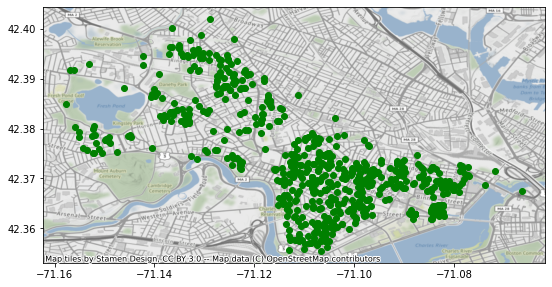

In [10]:
# Check visually the data
ax = geo_air_data.plot(color="green", figsize=(9, 9))
ctx.add_basemap(ax, crs=geo_air_data.crs.to_string())

In [11]:
# Loading the neighbourhood data, this is a geojeson file that contains the area of the varios 
# neigbourhood
neighbourhood = gpd.read_file("neighbourhoods.geojson")

In [12]:
neighbourhood

,neighbourhood,neighbourhood_group,geometry
0,The Port,None,"MULTIPOLYGON (((-71.09853 42.37183, -71.09846 ..."
1,Riverside,None,"MULTIPOLYGON (((-71.10399 42.36557, -71.10432 ..."
2,Area 2/MIT,None,"MULTIPOLYGON (((-71.08973 42.36490, -71.08941 ..."
3,Cambridgeport,None,"MULTIPOLYGON (((-71.10371 42.36541, -71.10362 ..."
4,Mid-Cambridge,None,"MULTIPOLYGON (((-71.10728 42.37809, -71.10416 ..."
5,Wellington-Harrington,None,"MULTIPOLYGON (((-71.09853 42.37183, -71.09855 ..."
6,East Cambridge,None,"MULTIPOLYGON (((-71.08849 42.36966, -71.08825 ..."
7,Cambridge Highlands,None,"MULTIPOLYGON (((-71.15641 42.39586, -71.15602 ..."
8,Strawberry Hill,None,"MULTIPOLYGON (((-71.15814 42.38690, -71.15749 ..."
9,Agassiz,None,"MULTIPOLYGON (((-71.11945 42.38831, -71.11870 ..."


In [13]:
# Drop the column neighbourhood_group column that is useless
neighbourhood.drop("neighbourhood_group", axis='columns', inplace=True)

## Retrieve data on neighborhoods and display statistical information on neighborhoods

I will use a dataset that is available in the Cambridge Data Portal and that contains information about the population divided by each neigbourhood.
In particualar the variables that will be taken into consideration will be:

- population of the district as percentage of the total 
- total population of the istrict
- Land area of the district as percentage of the total
- populaiton desnity measured as people per acre

The data about the populaiton are retrieved from: https://data.cambridgema.gov/Neighborhood-Census-Data/2013-17-Population-by-Neighborhood/46mc-c6qf

In [14]:
data_population = pd.read_csv("American_Community_Survey_2013_17_Estimates_by_Neighborhood__Basic_Demographics.csv")

In [15]:
data_population.head()

,Neighborhood,Area,Total Population,Population as % of City Total,Land Area in Acres,Persons per Acre,Land Area in Square Miles,Land Area as % of City Total,Male %,Female %,...,Persons per Household,Number of Families,Family w/ Children HHs %,Family w/o Children HHs %,Nonfamily HHs: Single Persons %,Nonfamily HHs: Roommate %,Pop. In Group Quarters %,Latitude,Longitude,Neighborhood Centerpoint
0,East Cambridge,1,10336,0.0932,405,25.5,0.63,0.0991,0.4930,0.5070,...,1.90,1913,0.130,0.2238,0.4398,0.2068,0.0042,42.368255,-71.079048,POINT (-71.0790483475 42.3682546726999)
1,Agassiz,8,5382,0.0485,192,28.0,0.30,0.0470,0.4541,0.5459,...,2.12,704,0.186,0.2397,0.3505,0.2234,0.3497,42.380727,-71.115354,POINT (-71.1153536627 42.3807269755999)
2,MIT,2,4859,0.0438,242,20.1,0.38,0.0592,0.5322,0.4678,...,2.33,60,0.138,0.1130,0.3682,0.3808,0.8856,42.357990,-71.091376,POINT (-71.09137581 42.3579900941)
3,West Cambridge,10,8603,0.0776,679,12.7,1.06,0.1661,0.4544,0.5456,...,2.18,2078,0.239,0.3140,0.3409,0.1062,0.0495,42.376688,-71.136169,POINT (-71.1361691253 42.3766884644999)
4,Cambridgeport,5,12621,0.1138,338,37.3,0.53,0.0827,0.5025,0.4975,...,2.12,1972,0.176,0.2117,0.3728,0.2392,0.1466,42.359193,-71.107803,POINT (-71.1078028199 42.3591933041999)


In [16]:
# By looking at the data we can see that the last row represent the total, hence we can discard it
# but first I will store these information in another object

population_total = data_population[-1:] 
data_population = data_population[:-1]

In [17]:
data_population.head()

,Neighborhood,Area,Total Population,Population as % of City Total,Land Area in Acres,Persons per Acre,Land Area in Square Miles,Land Area as % of City Total,Male %,Female %,...,Persons per Household,Number of Families,Family w/ Children HHs %,Family w/o Children HHs %,Nonfamily HHs: Single Persons %,Nonfamily HHs: Roommate %,Pop. In Group Quarters %,Latitude,Longitude,Neighborhood Centerpoint
0,East Cambridge,1,10336,0.0932,405,25.5,0.63,0.0991,0.4930,0.5070,...,1.90,1913,0.130,0.2238,0.4398,0.2068,0.0042,42.368255,-71.079048,POINT (-71.0790483475 42.3682546726999)
1,Agassiz,8,5382,0.0485,192,28.0,0.30,0.0470,0.4541,0.5459,...,2.12,704,0.186,0.2397,0.3505,0.2234,0.3497,42.380727,-71.115354,POINT (-71.1153536627 42.3807269755999)
2,MIT,2,4859,0.0438,242,20.1,0.38,0.0592,0.5322,0.4678,...,2.33,60,0.138,0.1130,0.3682,0.3808,0.8856,42.357990,-71.091376,POINT (-71.09137581 42.3579900941)
3,West Cambridge,10,8603,0.0776,679,12.7,1.06,0.1661,0.4544,0.5456,...,2.18,2078,0.239,0.3140,0.3409,0.1062,0.0495,42.376688,-71.136169,POINT (-71.1361691253 42.3766884644999)
4,Cambridgeport,5,12621,0.1138,338,37.3,0.53,0.0827,0.5025,0.4975,...,2.12,1972,0.176,0.2117,0.3728,0.2392,0.1466,42.359193,-71.107803,POINT (-71.1078028199 42.3591933041999)


In [18]:
population_total

,Neighborhood,Area,Total Population,Population as % of City Total,Land Area in Acres,Persons per Acre,Land Area in Square Miles,Land Area as % of City Total,Male %,Female %,...,Persons per Household,Number of Families,Family w/ Children HHs %,Family w/o Children HHs %,Nonfamily HHs: Single Persons %,Nonfamily HHs: Roommate %,Pop. In Group Quarters %,Latitude,Longitude,Neighborhood Centerpoint
13,City of Cambridge,100,110893,1.0,4087,27.1,6.39,1.0,0.4911,0.5089,...,2.12,19112,0.189,0.2427,0.3797,0.1882,0.1546,NaN,NaN,NaN


In [19]:
data_population[data_population["Persons per Acre"] == data_population["Persons per Acre"].max()]

,Neighborhood,Area,Total Population,Population as % of City Total,Land Area in Acres,Persons per Acre,Land Area in Square Miles,Land Area as % of City Total,Male %,Female %,...,Persons per Household,Number of Families,Family w/ Children HHs %,Family w/o Children HHs %,Nonfamily HHs: Single Persons %,Nonfamily HHs: Roommate %,Pop. In Group Quarters %,Latitude,Longitude,Neighborhood Centerpoint
6,Riverside,7,12361,0.1115,202,61.2,0.32,0.0494,0.5034,0.4966,...,2.08,1505,0.195,0.2117,0.3751,0.218,0.3784,42.36736,-71.114051,POINT (-71.1140506639 42.3673599896999)


In [20]:
data_population[data_population["Persons per Acre"] == data_population["Persons per Acre"].min()]

,Neighborhood,Area,Total Population,Population as % of City Total,Land Area in Acres,Persons per Acre,Land Area in Square Miles,Land Area as % of City Total,Male %,Female %,...,Persons per Household,Number of Families,Family w/ Children HHs %,Family w/o Children HHs %,Nonfamily HHs: Single Persons %,Nonfamily HHs: Roommate %,Pop. In Group Quarters %,Latitude,Longitude,Neighborhood Centerpoint
11,Cambridge Highlands,12,1332,0.012,189,7.0,0.3,0.0462,0.515,0.485,...,1.84,333,0.149,0.362,0.365,0.1242,0.0991,42.390053,-71.149912,POINT (-71.1499115037999 42.3900529878999)


In [21]:
data_population[data_population["Population as % of City Total"] == data_population["Population as % of City Total"].max()]

,Neighborhood,Area,Total Population,Population as % of City Total,Land Area in Acres,Persons per Acre,Land Area in Square Miles,Land Area as % of City Total,Male %,Female %,...,Persons per Household,Number of Families,Family w/ Children HHs %,Family w/o Children HHs %,Nonfamily HHs: Single Persons %,Nonfamily HHs: Roommate %,Pop. In Group Quarters %,Latitude,Longitude,Neighborhood Centerpoint
9,North Cambridge,11,13951,0.1258,550,25.4,0.86,0.1346,0.4619,0.5381,...,2.3,3217,0.241,0.2933,0.3179,0.1476,0.007,42.395323,-71.136075,POINT (-71.1360746043 42.3953229114)


In [22]:
# Moreover we can see that the two dataset have the same neighbourhood but one with a different name.
# It is better to make them equal and so I will substitute "MIT" with "Area 2/MIT"
data_population["Neighborhood"][2] = "Area 2/MIT"

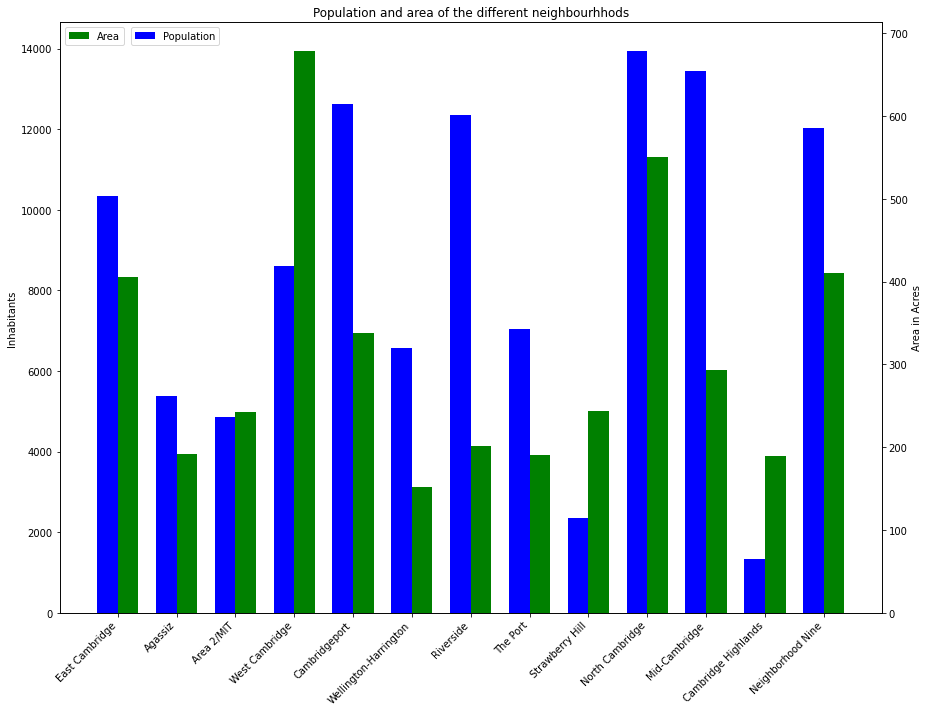

In [23]:
# Variables to plot
neighbour = data_population["Neighborhood"]
population = data_population["Total Population"]
area = data_population["Land Area in Acres"]

 # label locations
x = np.arange(len(neighbourhood))  
width = 0.35  # Width of the bars 

# First barplot, y axis on the right
fig, ax1 = plt.subplots(1,figsize= (13,10))
color = 'tab:red'
ax1.bar(x - width/2, population, width, label='Population', color="blue")
ax1.set_xticks(x)
ax1.set_xticklabels(neighbour, rotation = 45, ha="right")
ax1.set_ylabel('Inhabitants')
ax1.set_title('Population and area of the different neighbourhhods')
ax1.legend(bbox_to_anchor = (0.2,1))

# Second Barplot wiht the y axis on the left
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.bar(x + width/2, area, width, label='Area', color="green")
ax2.set_ylabel('Area in Acres')
ax2.legend(loc='upper left')

fig.tight_layout()
plt.show()

From ths Bar Plot is possible to see that, in general, the proportion between the populaiton and the ares is in favour of the population. Moreover, as can be seen, later the distribution of the populaiton is even informative of the distribution of the AirBnB location. This outcome can be  probably explained by the fact that, the less density populate area have less building space. For example Cambridge Higlands is the less populated district despite having an area that is comparable to others, this probably because here there is a big lake, hence less space for buildings. The same reasoning can be applied to other less populated district and with less presence of AirBnB.

In [24]:
# Getting the geographical informaiton of Cambridge
geo_cambridge = gpd.tools.geocode('Cambridge', provider="arcgis")

In [25]:
point = geo_cambridge.geometry[0]

In [26]:
# preparing the base of the figure
fig=Figure(width=800,height=800) # set the dimension of the figure
# Draw the basemap that correpsond to the city of Cambridge
m=folium.Map(location=[point.y,point.x],
             tiles='cartodbpositron',zoom_start=13)
# Add the neigbourhood contour
folium.GeoJson(
    neighbourhood,
    style_function = lambda feature: {
        'fillColor': 'None',
        'color': 'black',
        'weight': 1
    }
    ).add_to(m)

folium.Choropleth(
    geo_data = neighbourhood.to_json(),
    data = data_population,
    columns=['Neighborhood', 'Total Population'],
    key_on = 'feature.properties.neighbourhood',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,

    legend_name = "Inhabitants per District").add_to(m)


In [27]:
# Function that creates the marker, it takes in input the latitue and longitude of the position
# of the marker, the message that needs to put un the popup of the marker and the name 
# of the marker. The function return the marker.
def getMarker(lat,lon,name, message):
    marker = folium.Marker(location=[lat,lon],
            popup=folium.Popup(message, max_width=500),
            tooltip=name)
    return marker

In [28]:
# Function that creates the text for the popup by taking in input data aput the populaiton
# of a specific neigbourhood. It will return a message written in HTML.
def texter(row):
    pop_perc = "{:.0%}".format(row["Population as % of City Total"])
    land_perc = "{:.0%}".format(row["Land Area as % of City Total"])
    desnity = row["Persons per Acre"]
    population = row["Total Population"]
    message = """<h3>Here some demographic information</h3> <br/> 
                <ul> 
                <li>Total Population: {population}</li>
                <li>Population as % of City Total : {pop_perc}</li>
                <li>Land Area as % of City Total: {land_perc}</li>
                <li>People per Acre: {desnity}</li>
                </ul>
    """.format(**locals())
    return message

In [29]:
# Iterating over the 12 district in order to produce a marker and a test for each district
for i in range (0,13):
    # call the function texter and store the output in the variable message
    message = texter(data_population.iloc[i])
    # call the function getMarker and sotore the marker in marker
    marker = getMarker(data_population["Latitude"].iloc[i], 
                       data_population["Longitude"].iloc[i], 
                       data_population["Neighborhood"].iloc[i],
                      message)
    # add the marker to the folium map
    marker.add_to(m)

In [30]:
# Print the folium map
fig.add_child(m)
m

## Identify which are the districts with the highest prices in AirBnB

For doing that I will create a dataset with the average price of the AirBnB present in a certain district. 

In [31]:
# Get the general statistc paramentrs of the distribution of prices
air_data["price"].describe()
#  From this output we can see that the overall mean is 153 while the 75% is at 180, that means that the
#  distribution is assimetrical. This fact can be due to the presence of outliers.
#  Indeed the max value is 2857. 

count     694.000000
mean      153.730548
std       158.211243
min        29.000000
25%        71.000000
50%       118.500000
75%       180.000000
max      2857.000000
Name: price, dtype: float64

In [32]:
# Creating a list with all the unique name of the district, I will need this list later
list_district = list(set(neighbourhood["neighbourhood"]))

In [33]:
# Initializing a dataframe with three columns: the name of the district, the mean price for
# that district and the number of AirBnB present in that neighbourhood
district_price = pd.DataFrame(columns= ["neighbourhood", "mean_price", "number_of_hosts"])
# Iterating over the name of the various district using the list previously created
for district in list_district:
    # The if condition controls for neigbourhood that are not present in the airBnB dataset.
    # If this condition == False -> nothing happend
    if district in list(set(air_data['neighbourhood'])):
        # Subsetting from the airBnB dataset and keeping only the observation that correspond to the 
        # current neigbourhood
        subset = air_data[air_data['neighbourhood'] == district]
        # Calculaing how many hosts are located in the current neighbourhood
        number = len(subset.index)
        # Calculating the mean price for each neigbourhood
        price = round(subset['price'].mean(),2)
        # Appending to the dataframe the information abut the neibourhood and the respective mean price
        district_price = district_price.append({"neighbourhood": district, 
                                                "mean_price": price,
                                               "number_of_hosts" : number}, ignore_index = True)

In [34]:
# Displaying form the most expensive to the least the various neigbourhood.
district_price.sort_values(by= ["mean_price"], ascending = False)

,neighbourhood,mean_price,number_of_hosts
3,East Cambridge,229.02,102
11,Cambridge Highlands,181.40,5
0,Mid-Cambridge,174.80,111
7,Area 2/MIT,174.48,21
10,Riverside,140.40,43
4,Neighborhood Nine,137.89,44
2,The Port,137.79,61
9,North Cambridge,137.43,60
5,Cambridgeport,136.61,89
8,Agassiz,134.31,32


The three most expensive neighbourhoods are: 	East Cambridge with a mean price of 229, 	Cambridge Highlands with a mean price of 181 and third 	Mid-Cambridge with 174

In [35]:
# Creating a geodataframe by merging the informaiton about the location of the neigbourhood and the 
# mean price of each
geodistricty_price = neighbourhood.merge(district_price, on = "neighbourhood")

In [36]:
# Creating a shapefile witht the AirBnB data for the spatial autocorrelation analysis in R
#geodistricty_price.to_file("Cambridge.shp")

In [37]:
# Add a column geometry_2 that will contain the center point of each neighbourhood
geodistricty_price["geometry_2"] = geodistricty_price["geometry"].centroid
# Adding x and y coordinates from the centroids
geodistricty_price["x"] = geodistricty_price.geometry_2.map(lambda p: p.x)
geodistricty_price["y"] = geodistricty_price.geometry_2.map(lambda p: p.y)

C:\Users\fabio\Anaconda\envs\geospatial\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [38]:
# Displaying the dataframe just created
geodistricty_price.head()

,neighbourhood,geometry,mean_price,number_of_hosts,geometry_2,x,y
0,The Port,"MULTIPOLYGON (((-71.09853 42.37183, -71.09846 ...",137.79,61,POINT (-71.09682 42.36575),-71.096823,42.365754
1,Riverside,"MULTIPOLYGON (((-71.10399 42.36557, -71.10432 ...",140.40,43,POINT (-71.11405 42.36735),-71.114050,42.367351
2,Area 2/MIT,"MULTIPOLYGON (((-71.08973 42.36490, -71.08941 ...",174.48,21,POINT (-71.09137 42.35798),-71.091375,42.357981
3,Cambridgeport,"MULTIPOLYGON (((-71.10371 42.36541, -71.10362 ...",136.61,89,POINT (-71.10780 42.35918),-71.107802,42.359185
4,Mid-Cambridge,"MULTIPOLYGON (((-71.10728 42.37809, -71.10416 ...",174.80,111,POINT (-71.10836 42.37250),-71.108360,42.372505


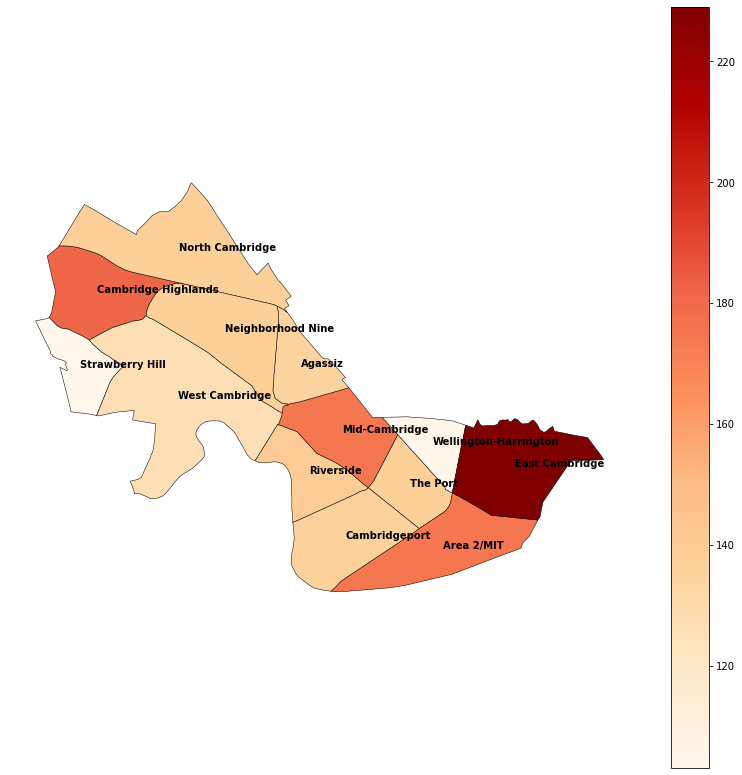

In [39]:
# Creating a map that will visually show the mean price for each district
texts = []
map_1 = geodistricty_price.plot(column='mean_price',legend=True,figsize=(14, 14),
                                   cmap="OrRd", edgecolor="black", linewidth = 0.5)
# Adding the name of the district in the center of each neigbourhood
for index, row in geodistricty_price.iterrows():
    texts.append(plt.text(row.x, row.y,
                          row.neighbourhood, 
                          fontsize = 10, color="black",fontweight='bold'))
map_1.set_axis_off()
plt.show()

By looking at this chart it is possible to see that the majority of the districts have a low price while only few have higher prices. Could be interesting to find out any spatial autocrrelaition of prices. This process will be held in R.

The neighborhoods with the highest prices are: **East Cambridge**, **Area 2/MIT** and **Cambridge Higlands** toghether with **Mid cambridge**. It is possible that the exspensive district of the East Cambridge have higher prices because it is close to Boston. The district Of Mid Cambridge could be one of the expensist district due to its central position nearby many museum. On the other hand the distric of Cambridge Higland could be expensier due to the presence of the Fresh Pond Reservation.

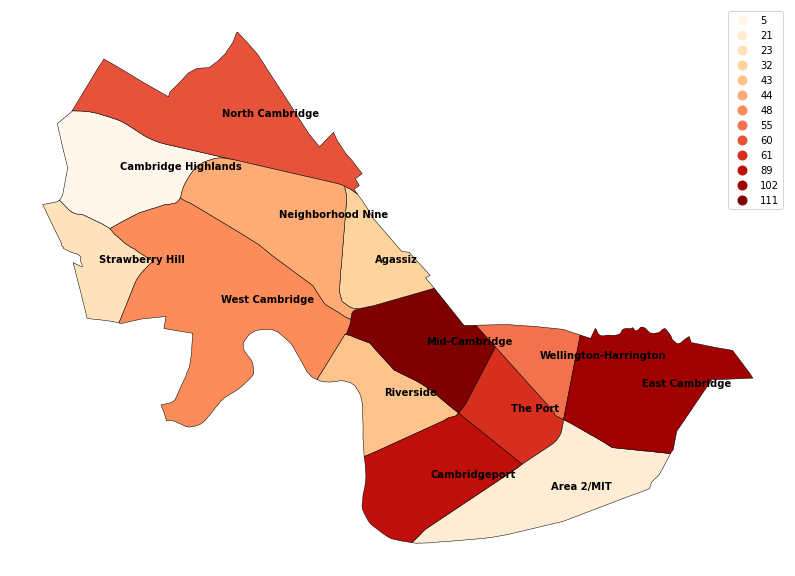

In [40]:
# It could be interesting to look visually at the distribution of AirBnB hosts and compare it with 
# the previous chart that shows the prices
texts = []
map_2 = geodistricty_price.plot(column='number_of_hosts',legend=True,figsize=(14, 14),
                                   cmap="OrRd", edgecolor="black", linewidth = 0.5)
# Adding the name of the district in the center of each neigbourhood
for index, row in geodistricty_price.iterrows():
    texts.append(plt.text(row.x, row.y,
                          row.neighbourhood, 
                          fontsize = 10, color="black",fontweight='bold'))
map_2.set_axis_off()
plt.show()


This map shows that the district of East Cambridge, other then being the expensier is even one of the district that hase the highest number of hosts. As said before this could be due to the fact that is the closest district to the city of Boston.

The District that shows the highest presence of AirBnb is Mid-Cambridge. Later it will possible to see that this neighborhood is even one of the district that has the higest presence of turist attraction. Maybe these two information are somehow correlated.

Interesting it is possible to see how, the area **Area 2/MIT** is one of the district with the highest prices, but on the other hand has only few AirBnB.

In [41]:
air_data[air_data.neighbourhood == "Cambridge Highlands"]

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,geometry
52,2642323,Huron Village Upper Unit Harvard Sq,4642626,Cambridge Highlands,42.38817,-71.14601,Entire home/apt,200,7,43,0.54,5,317,POINT (-71.14601 42.38817)
121,6556420,Nice room near Harvard Square,34289718,Cambridge Highlands,42.39178,-71.15617,Private room,70,2,131,1.99,1,23,POINT (-71.15617 42.39178)
433,29992024,4BR Beautiful New Cambridge Home,7372692,Cambridge Highlands,42.39294,-71.15302,Entire home/apt,475,1,6,0.26,1,330,POINT (-71.15302 42.39294)
533,38817473,Cambridge 超级舒适的公主风格房,23086232,Cambridge Highlands,42.39086,-71.13917,Shared room,60,91,0,NaN,1,90,POINT (-71.13917 42.39086)
551,39955033,Cambridge 2BD 2BTH Basement Apt with Free Parking,2356643,Cambridge Highlands,42.39166,-71.15692,Entire home/apt,102,30,3,0.26,1,365,POINT (-71.15692 42.39166)


In [42]:
air_data[air_data.neighbourhood == "Area 2/MIT"]

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,geometry
39,1840256,Lux 1 Bedroom Cambridge Apt by MIT,9419684,Area 2/MIT,42.36183,-71.08460,Entire home/apt,135,21,18,0.23,16,365,POINT (-71.08460 42.36183)
53,2879039,Lux 1 Bedroom Cambridge Apt by MIT,9419684,Area 2/MIT,42.36198,-71.08437,Entire home/apt,135,21,14,0.18,16,365,POINT (-71.08437 42.36198)
253,15369556,Private & Clean 2BR Apt | Gym | East Cambridge,95459395,Area 2/MIT,42.36252,-71.08428,Entire home/apt,318,30,1,0.04,9,361,POINT (-71.08428 42.36252)
438,30386484,"Calming Kendall Square Studio w/ Gym, near MIT...",107434423,Area 2/MIT,42.36288,-71.08784,Entire home/apt,194,32,1,0.05,29,251,POINT (-71.08784 42.36288)
439,30389876,"Bright + Mod Kendall Sq 1BR w/ Gym, walk to MI...",107434423,Area 2/MIT,42.36288,-71.08784,Entire home/apt,158,32,1,0.05,29,364,POINT (-71.08784 42.36288)
440,30389899,"Gentle Kendall Sq Studio, Gym, Doorman, near M...",107434423,Area 2/MIT,42.36288,-71.08784,Entire home/apt,154,32,0,NaN,29,321,POINT (-71.08784 42.36288)
441,30389924,"Hip 1BR, Kendall Square, Gym, Doorman, walk to...",107434423,Area 2/MIT,42.36288,-71.08784,Entire home/apt,199,32,0,NaN,29,301,POINT (-71.08784 42.36288)
442,30390003,"Sleek Kendall Sq 2BR, Gym, Doorman, walk to MI...",107434423,Area 2/MIT,42.36288,-71.08784,Entire home/apt,270,32,1,0.20,29,283,POINT (-71.08784 42.36288)
443,30390533,"Serene Studio, Kendall Square, Gym, walk to MI...",107434423,Area 2/MIT,42.36288,-71.08784,Entire home/apt,130,32,1,0.06,29,331,POINT (-71.08784 42.36288)
444,30397057,"Industrial 1BR near MIT w/ Gym, Doorman, Roof ...",107434423,Area 2/MIT,42.36288,-71.08784,Entire home/apt,173,32,0,NaN,29,350,POINT (-71.08784 42.36288)


## Identify which are the districts with the greatest number of tourist activities

In order to identiy the districts with the greatest number of tourist I decided to search through overpass-turbo some places of specific interest to turist.

In [43]:
# load the geo dataframe containing museum and arts in cambridge
art_museum = gpd.read_file("art_museum.geojson")

In [44]:
#This is the query maden.

#[out:json][timeout:25];
#// fetch area “Cambridge massachusset” to search in
#geocodeArea:Cambridge MA}}->.searchArea;
#// gather results
#(
#  node["tourism"="museum"](area.searchArea);
#  way["tourism"="museum"](area.searchArea);
#  relation["tourism"="museum"](area.searchArea);
#  
#  node["amenity"="arts_centre"](area.searchArea);
#  way["amenity"="arts_centre"](area.searchArea);
#  relation["amenity"="arts_centre"](area.searchArea);
#
#  node["tourism"="attraction"](area.searchArea);
#   way["tourism"="attraction"](area.searchArea);
#   relation["tourism"="attraction"](area.searchArea);
#);
#// print results
#out body;
#>;
#out skel qt;

In [45]:
# For an easier disply I convert the polygon into their centroids
art_museum.geometry = art_museum['geometry'].centroid

C:\Users\fabio\Anaconda\envs\geospatial\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [46]:
# Displaying the Dataset loaded
art_museum.head(5)

,id,@id,addr:city,addr:state,addr:street,alt_name,building,building:levels,ele,gnis:county_name,...,opening_hours,toilets:wheelchair,wheelchair,email,fee,leisure,seamark:harbour:category,seamark:type,place,geometry
0,way/25589604,way/25589604,Boston,MA,Museum of Science Driveway,Boston Museum of Science,yes,4,7,Suffolk,...,None,None,None,None,None,None,None,None,None,POINT (-71.07095 42.36740)
1,way/29515392,way/29515392,None,None,None,None,yes,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-71.11411 42.37513)
2,way/29683759,way/29683759,None,None,Linnaean Street,None,yes,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-71.12182 42.38450)
3,way/29810045,way/29810045,None,None,Hampshire Street,None,yes,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-71.09202 42.36684)
4,way/29821531,way/29821531,None,None,None,None,yes,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-71.11416 42.37414)


In [47]:
# Preparing the base of the figure
fig2=Figure(width=800,height=800)
m2=folium.Map(location=[point.y,point.x],
             tiles='cartodbpositron',zoom_start=12)
# Adding the nigbourhood contour.
folium.GeoJson(
    neighbourhood,
    style_function = lambda feature: {
        'fillColor': 'None',
        'color': 'black',
        'weight': 1
    }
    ).add_to(m2)

folium.GeoJson(
    art_museum).add_to(m2)

In [48]:
# Function that creates the marker
def Marker(name,lat,lon):
    
    marker = folium.Marker(
            location = [lat,lon], # Location for the marker
            # This marker will print on the center of the neigbourhood its name.
            icon = folium.features.DivIcon(
                html = "<h4>{name}</h4>".format(**locals())
            ))
                               
    return marker

In [49]:
# Iterating over the 12 district, colling the marker function 
for i in range (0,13):
    name = neighbourhood["neighbourhood"]
    centroids =  neighbourhood["geometry"].iloc[i].centroid
    marker = Marker(
        name[i],
        lat = float(str(centroids).split()[2][:-1]), 
        lon = float(str(centroids).split()[1][1:])
    )
    marker.add_to(m2)

In [50]:
# Plotting the folium map
fig2.add_child(m2)
m2

By qualitativelly looking at the map it is possible to state that the districts with the greatest number of tourists activities are *Mid-Cambridge* and *Agassiz*.

## Find the location of 3 AirBnB hosts closest to one of the city's museums (on walking distance)

For each AirBnB host I will find the closest museum and the walking distance to this museum. For doing that I will calculate the shortest walking path and then calcualte the time needed for each AirBnB host to each museum and then I will choose the musuem that is the closet.

In [51]:
# Storing the walking network of Cambridge
G = ox.graph_from_place("Cambridge, US", network_type='walk')

In [52]:
# File that contain the museum of cambridge. The file is the ouytput of a Overpass Turbo Query.
museum = gpd.read_file("museum.geojson")

In [53]:
museum.head()

,id,@id,addr:city,addr:state,addr:street,alt_name,building,building:levels,ele,gnis:county_name,...,protection_title,addr:postcode,operator,phone,website,url,opening_hours,toilets:wheelchair,wheelchair,geometry
0,way/25589604,way/25589604,Boston,MA,Museum of Science Driveway,Boston Museum of Science,yes,4,7,Suffolk,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-71.07230 42.36785, -71.07195 42.367..."
1,way/29515392,way/29515392,None,None,None,None,yes,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-71.11408 42.37488, -71.11400 42.375..."
2,way/29683759,way/29683759,None,None,Linnaean Street,None,yes,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-71.12188 42.38444, -71.12173 42.384..."
3,way/29821531,way/29821531,None,None,None,None,yes,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-71.11431 42.37384, -71.11428 42.373..."
4,way/29831146,way/29831146,None,None,None,None,None,None,None,None,...,National Historic Site,None,None,None,None,None,None,None,None,"POLYGON ((-71.12696 42.37667, -71.12612 42.376..."


In [54]:
# For an easier disply I convert the polygon into their centroids
museum.geometry = museum['geometry'].centroid

C:\Users\fabio\Anaconda\envs\geospatial\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [55]:
# Deleting all the column that contain none
museum.dropna(axis=1, how='any', thresh=None, subset=None, inplace=True)

In [56]:
museum

,id,@id,name,tourism,geometry
0,way/25589604,way/25589604,Museum of Science,museum,POINT (-71.07095 42.36740)
1,way/29515392,way/29515392,Arthur M. Sackler Museum,museum,POINT (-71.11411 42.37513)
2,way/29683759,way/29683759,Cooper-Frost-Austin House,museum,POINT (-71.12182 42.38450)
3,way/29821531,way/29821531,Harvard Art Museums,museum,POINT (-71.11416 42.37414)
4,way/29831146,way/29831146,Longfellow National Historic House,museum,POINT (-71.12634 42.37700)
5,way/29932762,way/29932762,Semitic Museum,museum,POINT (-71.11395 42.37808)
6,node/367781113,node/367781113,Peabody Museum of Archaeology and Ethnology,museum,POINT (-71.11503 42.37816)
7,node/367781117,node/367781117,MIT Museum,museum,POINT (-71.09765 42.36209)
8,node/367781122,node/367781122,Harvard University Museum of Comparative Zoology,museum,POINT (-71.11563 42.37873)
9,node/367781130,node/367781130,Harvard University Museums of Natural History,museum,POINT (-71.11548 42.37833)


In [57]:
# Dropping uselss columns
museum.drop(["@id","tourism"], axis='columns', inplace=True)

The last thing needed in order to calcualte properly the closest path is the closeset representative locaiton to each of the element in the dataset. This must be done becuse in order to calcluate the wlaking path I will use the walking network of Cambridge.

In [58]:
# Find the closest representative point for each location and store it in a column that is 
# closest_point_museum
museum["closest_point_museum"] = museum.geometry.representative_point().apply(
                    lambda point: ox.get_nearest_node(G, (point.y,point.x)))

In [59]:
museum

,id,name,geometry,closest_point_museum
0,way/25589604,Museum of Science,POINT (-71.07095 42.36740),7745736244
1,way/29515392,Arthur M. Sackler Museum,POINT (-71.11411 42.37513),7631495304
2,way/29683759,Cooper-Frost-Austin House,POINT (-71.12182 42.38450),7896005773
3,way/29821531,Harvard Art Museums,POINT (-71.11416 42.37414),7631495438
4,way/29831146,Longfellow National Historic House,POINT (-71.12634 42.37700),5307137757
5,way/29932762,Semitic Museum,POINT (-71.11395 42.37808),5147915576
6,node/367781113,Peabody Museum of Archaeology and Ethnology,POINT (-71.11503 42.37816),5147915569
7,node/367781117,MIT Museum,POINT (-71.09765 42.36209),7866981386
8,node/367781122,Harvard University Museum of Comparative Zoology,POINT (-71.11563 42.37873),454071727
9,node/367781130,Harvard University Museums of Natural History,POINT (-71.11548 42.37833),3809858782


In order to avoid any confusion and overvriting on the dataset I decide to create a new and smaller one that will contain all the information about AirBnB

In [60]:
# I will create a smallere AirBnB dataset.
air_small = pd.read_csv("listings.csv")

In [61]:
# Drop some useless columns in order to produce a more readable dataset
air_small.drop([ 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'host_id', 
                "neighbourhood_group", "last_review", "host_name",], axis='columns', inplace=True)

In [62]:
# Converting to a geodataframe
air_small = gpd.GeoDataFrame(
    air_small,
    crs='EPSG:4326',
    geometry=gpd.points_from_xy(air_small.longitude, air_small.latitude))

In [63]:
air_small.head()

,id,name,neighbourhood,latitude,longitude,geometry
0,8521,SunsplashedSerenity walk to Harvard & Fresh Pond,West Cambridge,42.38329,-71.13617,POINT (-71.13617 42.38329)
1,11169,"Lovely Studio Room: Thu-Mons, Near Universities",North Cambridge,42.39469,-71.13223,POINT (-71.13223 42.39469)
2,11945,Near Harvard: Safe & Lovely Room,North Cambridge,42.39454,-71.13431,POINT (-71.13431 42.39454)
3,19581,"Furnished suite, Windsor",The Port,42.36276,-71.09765,POINT (-71.09765 42.36276)
4,22006,B & B near Harvard's Quad Houses,Neighborhood Nine,42.38670,-71.12387,POINT (-71.12387 42.38670)


In [64]:
# Find the closest representative point for each location as before for museum
air_small["closest_point_bnb"] = air_small.geometry.representative_point().apply(
                    lambda point: ox.get_nearest_node(G, (point.y,point.x)))

In [65]:
air_small.head()

,id,name,neighbourhood,latitude,longitude,geometry,closest_point_bnb
0,8521,SunsplashedSerenity walk to Harvard & Fresh Pond,West Cambridge,42.38329,-71.13617,POINT (-71.13617 42.38329),7632235241
1,11169,"Lovely Studio Room: Thu-Mons, Near Universities",North Cambridge,42.39469,-71.13223,POINT (-71.13223 42.39469),7872954675
2,11945,Near Harvard: Safe & Lovely Room,North Cambridge,42.39454,-71.13431,POINT (-71.13431 42.39454),61321782
3,19581,"Furnished suite, Windsor",The Port,42.36276,-71.09765,POINT (-71.09765 42.36276),61321377
4,22006,B & B near Harvard's Quad Houses,Neighborhood Nine,42.38670,-71.12387,POINT (-71.12387 42.38670),7896245581


Now I need to find the walking distance between each AirBnB and each museum. Once this will be done I will select the closest museum for each AirBnB. In the AirBnB dataset I will store the data about the distance of the closes museum and the name and location of the museum.

In [66]:
# Add speed and travel time to the edges
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

In [67]:
edges = ox.graph_to_gdfs(G,edges=True,nodes=False)

In [68]:
# Function that create the path from a given AirBnB location to eacht of the 14 museum.
# The function will return a dataset that contain the id of the museum and its path
def pather(accomodation):
    # Creating a dataframe where I will store the path for eath musuem and it's correspondong musum id
    path = pd.DataFrame()
    # The shortest path will be store in the colum route 
    path["route"] = museum.closest_point_museum.apply(lambda to_point: 
                ox.shortest_path(G, accomodation, to_point))
    path["museum_id"] = museum.id
    
    return path

In [69]:
# Function that takes as input the path dataset previously created and will calcluate the time 
# needed to reach all the musuem from a certain AirBnb location.
# The output of the funciton will be a dataset that has as columns the id of the musuem, its 
# rout and the time needed to reach it.
def distancer (path):
    # Initialising the dataframe that will contain the output
    distance = pd.DataFrame(columns = ["museum_id","distance", "route"])
    # Iterating over the row of the dataset with the various paths
    for index, row in path.iterrows(): 
        # For each route I will calcluate the time neede
        edge_times = ox.utils_graph.get_route_edge_attributes(G, row["route"], 'travel_time')
        somma = sum(edge_times)
        # Store the informaiton on the previousply created dataset
        distance = distance.append({"museum_id" : row["museum_id"],
                                   "distance" : somma,
                                   "route" : row["route"]},
                                  ignore_index = True)
    return distance

In [70]:
# This function takes a while since it has to iterate over all the AirBnB hosts
# Initialise a dataset that will contain the output desired
complete_data = pd.DataFrame(columns = ["id_airbnb","id_museum", "time", 
                                        "route", "geometry", "name_bnb", "name_museum"])
# Iterating throught the rows of the AirBnB dataset. I will consider each host one by one and for 
# each I will choose the closest museum
for index, row in air_small.iterrows():
    # Call the pather fuction that will create a datset with all to the path for the current host
    path = pather(row["closest_point_bnb"])
    # Call the distancer function that will calcualte the the time travel for each musuem
    dist = distancer(path)
    # Find the museum that needs less time to reach
    row_min = dist[dist.distance == dist.distance.min()]
    # Strore the data in the final dataset
    complete_data = complete_data.append({"id_airbnb" : row["id"],
                        "id_museum" : row_min.museum_id.iloc[0],
                         "time" : row_min.distance.iloc[0],
                         "route" : row_min.route.iloc[0],
                        "geometry": row["geometry"],
                        "name_bnb": row["name"],
                    "name_museum": museum.name[museum.id == row_min.museum_id.iloc[0]].iloc[0]},
                         ignore_index = True)

In [71]:
complete_data.head()

,id_airbnb,id_museum,time,route,geometry,name_bnb,name_museum
0,8521,way/29831146,109.6,"[7632235241, 7632235236, 7632235302, 763223528...",POINT (-71.13616999999999 42.38329),SunsplashedSerenity walk to Harvard & Fresh Pond,Longfellow National Historic House
1,11169,way/29683759,177.6,"[7872954675, 5504189721, 7872954715, 787295471...",POINT (-71.13223000000001 42.39469),"Lovely Studio Room: Thu-Mons, Near Universities",Cooper-Frost-Austin House
2,11945,way/29683759,176.2,"[61321782, 7632303061, 61321450, 61321442, 763...",POINT (-71.13431 42.39454),Near Harvard: Safe & Lovely Room,Cooper-Frost-Austin House
3,19581,node/367781117,9.6,"[61321377, 5737576857, 7866981386]",POINT (-71.09765 42.36275999999999),"Furnished suite, Windsor",MIT Museum
4,22006,way/29683759,39.2,"[7896245581, 7896005708, 7896245679, 61330081,...",POINT (-71.12387 42.3867),B & B near Harvard's Quad Houses,Cooper-Frost-Austin House


In [72]:
# Now I can select the three AirBnB that have their closets musuem
three_best = complete_data.nsmallest(3, "time", keep = "first")

In [73]:
#The three best AirBnB results closest to the same Museum 
three_best

,id_airbnb,id_museum,time,route,geometry,name_bnb,name_museum
242,14974786,node/1816988562,6.2,"[7631495262, 7631495296]",POINT (-71.11383000000001 42.37464),Phil's Apartment at Harvard - Harvard Room,Arthur M. Sackler Museum
3,19581,node/367781117,9.6,"[61321377, 5737576857, 7866981386]",POINT (-71.09765 42.36275999999999),"Furnished suite, Windsor",MIT Museum
208,13203203,node/367781117,9.6,"[61321377, 5737576857, 7866981386]",POINT (-71.098 42.36245),One Bedroom Close to MIT (1512),MIT Museum


In [74]:
# Create a dataset that contains the name and the location of the airbnb and of the museum
positions = pd.DataFrame(columns = ["id","name","geometry"])

for index, row in three_best.iterrows():
    positions = positions.append({
            "id" : row.id_airbnb,
            "name" :  geo_air_data.name[geo_air_data.id == row.id_airbnb].iloc[0],
            "geometry" : geo_air_data.geometry[geo_air_data.id == row.id_airbnb].iloc[0]},
                ignore_index = True)
    positions = positions.append({    
            "id" : row.id_museum,
            "name" :  museum.name[museum.id == row.id_museum].iloc[0],               
            "geometry" : museum.geometry[museum.id == row.id_museum].iloc[0]},
                             ignore_index = True)


In [75]:
# From the previous dataframe I will drop all the observation that have the same id in order to 
# avoid producing duplicates pop-up
positions.drop_duplicates(subset = "id", keep = "first", inplace = True)

In [76]:
# Adding latitude and longitude separatelly. I need this information for displaying the three route
positions["long"] = positions.geometry.map(lambda p: p.x)
positions["lat"] = positions.geometry.map(lambda p: p.y)

In [77]:
# I can see that I have three different AirBnB that are closer to the same museum
positions

,id,name,geometry,long,lat
0,14974786,Phil's Apartment at Harvard - Harvard Room,POINT (-71.11383000000001 42.37464),-71.113830,42.374640
1,node/1816988562,Arthur M. Sackler Museum,POINT (-71.114144 42.3750967),-71.114144,42.375097
2,19581,"Furnished suite, Windsor",POINT (-71.09765 42.36275999999999),-71.097650,42.362760
3,node/367781117,MIT Museum,POINT (-71.0976545 42.362087),-71.097655,42.362087
4,13203203,One Bedroom Close to MIT (1512),POINT (-71.098 42.36245),-71.098000,42.362450


In [78]:
# In order to be able to plot the three paths I need  a list made of lists that contian 
# as elements the coordinates of the points that form the path I need the function pointer.
# This function takes as input the path as previously calculated and return a list made of lists
# that contain the coordinate latitue and lingitude
def pointer (route):
    # Initialising the list that will contain the other lists
    path = []
    # Iterating over each node of the path
    for idnode in route:
        # For each node get latitude and longitue
        lon = G.nodes[idnode]['x']
        lat = G.nodes[idnode]['y']
        # Store these data into a list
        point = [lat,lon]
        # Append this list to the final output
        path.append(point)
    return path

In [79]:
# Function that creates the marker
def getMarker(lat, lon, name):
    # This marker simply creates a marker in the place of the AirBnB or the the museum
    # and insert its name 
    marker = folium.Marker(location=[lat,lon],
            tooltip=name)
    return marker

In [80]:
# Initialising the dataframe that will contain the paths made by a list o lists
coordinate_paths = pd.DataFrame(columns = ["paths"])
# iterating over the three paths that I found
for i in range(0,3):
    # Call the function that convert
    path_converted = pointer(three_best.route.iloc[i])
    # Store the converted path into the previously initialised dataset
    coordinate_paths = coordinate_paths.append({"paths" : path_converted},  
                                                 ignore_index = True)
    

In [81]:
# Create a folium basemap
fig5=Figure(width=800,height=800)
m5=folium.Map(location=[point.y,point.x],
             tiles='OpenStreetMap',zoom_start=12)

In [82]:
# Initialising some feauture group in order to allow the possibility of hide the path on the map 
f1=folium.FeatureGroup("Route 1")
f2=folium.FeatureGroup("Route 2")
f3=folium.FeatureGroup("Route 3")
# Draw the three different paths and add them to the folium feature
folium.vector_layers.PolyLine(coordinate_paths.paths.iloc[0], color='red').add_to(f1)
folium.vector_layers.PolyLine(coordinate_paths.paths.iloc[1],color='blue').add_to(f2)
folium.vector_layers.PolyLine(coordinate_paths.paths.iloc[2],color='green').add_to(f3)

In [83]:
# Iterate over the dataset that contains the positions of the element (AirBnB and museum) taken itno consideratio
for index, row in positions.iterrows():
    # Each time I recall the function getMarker that will create a marker for each point
    marker = getMarker(row.lat, row.long, row["name"])
    marker.add_to(m5)

In [84]:
# Add the folium feature to the mapp
f1.add_to(m5)
f2.add_to(m5)
f3.add_to(m5)
# Add the layer control on the top right of the map 
folium.LayerControl().add_to(m5)
# Display the map
fig5.add_child(m5)
m5

In [85]:
for i in range (0,3):
    print("Place: ", i)
    print("It will take ", three_best.time.iloc[i], " minutes, to reach the musuem ", three_best.name_museum.iloc[i], " from the AirBnB ", three_best.name_bnb.iloc[i], "\n")

Place:  0
It will take  6.2  minutes, to reach the musuem  Arthur M. Sackler Museum  from the AirBnB  Phil's Apartment at Harvard - Harvard Room 

Place:  1
It will take  9.6  minutes, to reach the musuem  MIT Museum  from the AirBnB  Furnished suite, Windsor 

Place:  2
It will take  9.6  minutes, to reach the musuem  MIT Museum  from the AirBnB  One Bedroom Close to MIT (1512) 



## Of the three hosts, identify which one has the greatest number of services (supermarkets, pharmacies, restaurants) in an area of 300m 

In [86]:
# Recreate the dataset with the three closest accomodation, and I drop some clumn that are useless
three_hosts = complete_data.nsmallest(3, "time", keep = "first")
three_hosts.drop(["id_museum","time", "route"], axis='columns', inplace=True)

In [87]:
# From the geomentry I nedd to create to column latitude and longitude
three_hosts["long"] = three_hosts.geometry.map(lambda p: p.x)
three_hosts["lat"] = three_hosts.geometry.map(lambda p: p.y)

In [88]:
# The method osmnx.geometries.geometries_from_point() requires as point a touple 
# that contain latitude and longitude. From the previously created column 
# I create a new one that contain the touple
three_hosts['lat_long'] = list(zip(three_hosts.lat, three_hosts.long))

In [89]:
# Tags needed in the query
tags = {'shop': 'supermarket', 'amenity' : ['pharmacy', 'restaurant']}

In [90]:
# Storing the touple with the coordinates into three different variables
point_0 = three_hosts.lat_long.iloc[0]
point_1 = three_hosts.lat_long.iloc[1]
point_2 = three_hosts.lat_long.iloc[2]

In [91]:
# Querying OpenStreetMap with the point previously maden, the tgas and asking for everithing in a 
# radious of 300 eters
services_0 = ox.geometries.geometries_from_point(point_0, tags, 300)
services_1 = ox.geometries.geometries_from_point(point_1, tags, 300)
services_2 = ox.geometries.geometries_from_point(point_2, tags, 300)

In [92]:
print("The AirBnB ", three_hosts.name_bnb.iloc[0], " has ", len(services_0.index), " services nearby", "\n")
print("The AirBnB ", three_hosts.name_bnb.iloc[1], " has ", len(services_1.index), " services nearby", "\n")
print("The AirBnB ", three_hosts.name_bnb.iloc[2], " has ", len(services_2.index), " services nearby", "\n")

The AirBnB  Phil's Apartment at Harvard - Harvard Room  has  6  services nearby 

The AirBnB  Furnished suite, Windsor  has  16  services nearby 

The AirBnB  One Bedroom Close to MIT (1512)  has  21  services nearby 



C:\Users\fabio\Anaconda\envs\geospatial\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [93]:
# From the geomentry I nedd to create to column latitude and longitude
services_2["long"] = services_2.geometry.map(lambda p: p.x)
services_2["lat"] = services_2.geometry.map(lambda p: p.y)

In [94]:
# Function that creates the marker
def getMarker(lat,lon, name):

    marker = folium.Marker(location=[lat, lon],
            icon = folium.Icon(color='green',prefix='fa',icon='cutlery'),
            tooltip=name)
    return marker

C:\Users\fabio\Anaconda\envs\geospatial\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [95]:
# Create a folium basemap
fig6=Figure(width=800,height=800)
m6=folium.Map(location=[point.y,point.x],
             tiles='OpenStreetMap',zoom_start=12)

folium.Marker(location=[point_2[0], point_2[1]],
            icon = folium.Icon(color='red',prefix='fa',icon='bed'),
            tooltip=three_hosts.name_bnb.iloc[2]).add_to(m6)


In [96]:
# Iterate over the dataset that contains the positions of the element (AirBnB and museum) taken itno consideratio
for index, row in services_2.iterrows():
    # Each time I recall the function getMarker that will create a marker for each point
    marker = getMarker(row.lat, row.long, row["name"])
    marker.add_to(m6)

In [97]:
# Display the map
fig6.add_child(m6)
m6